In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


# Installing all the requirements files present in the yolo v5 requirements file

In [2]:
!cd yolov5 & pip install -r requirements.txt

  Attempting uninstall: setuptools
    Found existing installation: setuptools 61.2.0
    Uninstalling setuptools-61.2.0:
      Successfully uninstalled setuptools-61.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, but you have pyqt5 5.15.9 which is incompatible.
google-api-core 1.25.1 requires six>=1.13.0, but you have six 1.12.0 which is incompatible.


# Importing the necassary libraries required 

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Using the predefined model to predict the results on the sample raw input 

In [4]:
model = torch.hub.load("ultralytics/yolov5" , "yolov5s")

Using cache found in C:\Users\ACER ES1 512/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-6 Python-3.9.12 torch-1.13.0+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# Lets test on the sample image ....

In [11]:
img = "https://imgs.search.brave.com/Q2Aum17KmsLDqIDy2ybB8-st437ydcyohV2PSEQz-gE/rs:fit:469:225:1/g:ce/aHR0cHM6Ly90c2Ux/Lm1tLmJpbmcubmV0/L3RoP2lkPU9JUC5C/MEdBVEI3aU5LUGxr/VGtzM3BhRmZnSGFI/ZiZwaWQ9QXBp"

# Printing the results ... to find the different classes of the object detected 

In [12]:
results = model(img)
results.print()

image 1/1: 225x223 14 cars, 2 trucks
Speed: 406.2ms pre-process, 1524.9ms inference, 8.0ms NMS per image at shape (1, 3, 640, 640)


# Plotting the feed results on the matplotlib 

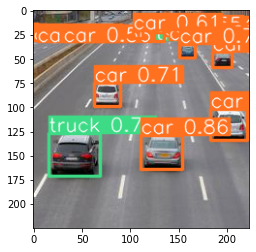

In [13]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Taking the realtime feed and detecting the objects .....

In [17]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    
    ret , frame = cap.read()
    
    
    
    results = model(frame)
    
    
    cv2.imshow("Yolo" , np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# Results from the real time 


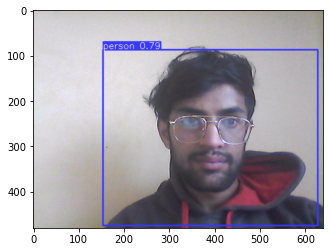

In [16]:
%matplotlib inline
plt.imshow( cv2.cvtColor( np.squeeze(results.render()) , cv2.COLOR_BGR2RGB ))
plt.show()